# Advanced Visualizations:
We will have a deeper look into our data as preperation to the machine learning task we want to tackle.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
#As always, we need to load our data (file name: race_df_with_advanced_features.pkl):
race_df = pd.read_pickle('race_df_with_advanced_features.pkl')
race_df.head(5)

qgrid_pos  Nr.       Driver      Team  fp2_pos     fp2_t  fp3_pos  \
0          3    8    F. Alonso   Ferrari      9.0  117140.0      1.0   
1          2    7     F. Massa   Ferrari      7.0  116555.0      6.0   
2          4    2  L. Hamilton   McLaren      2.0  115854.0     12.0   
3          1    5    S. Vettel  Red Bull      5.0  116459.0      5.0   
4          5    4   N. Rosberg  Mercedes      1.0  115409.0      2.0   

      fp3_t  fp1_pos     fp1_t  ...  hist_fp2_pos  hist_fp3_pos  hist_fp1_pos  \
0  114099.0      2.0  116766.0  ...           NaN           NaN           NaN   
1  114739.0      4.0  117055.0  ...           NaN           NaN           NaN   
2  115860.0      6.0  117163.0  ...           NaN           NaN           NaN   
3  114646.0     13.0  117943.0  ...           NaN           NaN           NaN   
4  114368.0      8.0  117199.0  ...           NaN           NaN           NaN   

   hist_q_pos  hist_race_pos  best_fp_pos  worst_fp_pos mean_fp_pos  \
0         NaN            NaN          1.0           3.0         2.0   
1         NaN            NaN          6.0           1.0         5.0   
2         NaN            NaN         12.0           4.0         6.0   
3         NaN            NaN          5.0          10.0         7.0   
4         NaN            NaN          2.0           5.0         1.0   

   r_hist_qgrid_pos_2_fp  r_hist_race_pos_2_fp  
0                    NaN                   NaN  
1                    NaN                   NaN  
2                    NaN                   NaN  
3                    NaN                   NaN  
4                    NaN                   NaN  

[5 rows x 50 columns]

## How did the 2020 championship play out:
We will create a small df with the 2020 data.<br>
We we will cummulate (find the function in the Pandas docs) the chamionship points of every driver and plot them against the race number.

In [3]:
#Create the 2020 df:
race2020df = race_df[race_df['year']==2020]
race2020df.head(5)

qgrid_pos  Nr.       Driver      Team  fp2_pos    fp2_t  fp3_pos  \
4358          1   77    V. Bottas  Mercedes      2.0  64501.0      2.0   
4359          7   16   C. Leclerc   Ferrari      9.0  65298.0      5.0   
4360          3    4    L. Norris   McLaren      6.0  65087.0     10.0   
4361          5   44  L. Hamilton  Mercedes      1.0  64304.0      1.0   
4362          8   55     C. Sainz   McLaren     10.0  65352.0     13.0   

        fp3_t  fp1_pos    fp1_t  ...  hist_fp2_pos  hist_fp3_pos  \
4358  64277.0      2.0  65172.0  ...      3.000000           4.0   
4359  64703.0     10.0  65924.0  ...      2.666667           6.2   
4360  64950.0      6.0  65621.0  ...     12.500000           8.6   
4361  64129.0      1.0  64816.0  ...      3.166667           3.0   
4362  65177.0      4.0  65431.0  ...     10.166667           8.8   

      hist_fp1_pos  hist_q_pos  hist_race_pos  best_fp_pos  worst_fp_pos  \
4358      5.000000    3.666667       2.200000          2.0           2.0   
4359      4.166667    2.833333       6.333333          5.0          10.0   
4360     13.166667    8.333333       8.400000         10.0           6.0   
4361      6.500000    3.166667       2.500000          1.0           1.0   
4362      9.833333    9.333333       7.500000         13.0           4.0   

     mean_fp_pos  r_hist_qgrid_pos_2_fp  r_hist_race_pos_2_fp  
4358         2.0               3.166667              1.100000  
4359         9.0               0.833333              1.266667  
4360         5.0               0.783333              0.840000  
4361         1.0               3.000000              2.500000  
4362        10.0               0.692308              0.576923  

[5 rows x 50 columns]

In [4]:
#Calculate the cummulated championship points
race2020df = race2020df.sort_values(['race_idx']).reset_index(drop=True)
race2020df["cum_champ_points"] = race2020df.groupby(['Driver'])['champ_points'].cumsum(axis=0)
race2020df.tail(5)

qgrid_pos  Nr.         Driver          Team  fp2_pos    fp2_t  fp3_pos  \
335          2   77      V. Bottas      Mercedes      1.0  96276.0      9.0   
336          1   33  M. Verstappen      Red Bull      3.0  97046.0      1.0   
337         17   51  P. Fittipaldi       Haas F1     19.0  99027.0     20.0   
338         10   31        E. Ocon        Alpine      6.0  97505.0      4.0   
339         19   11       S. Perez  Aston Martin      7.0  97506.0     10.0   

       fp3_t  fp1_pos     fp1_t  ...  hist_fp3_pos  hist_fp1_pos  hist_q_pos  \
335  97085.0      2.0   97412.0  ...           3.0           3.8    2.666667   
336  96251.0      1.0   97378.0  ...           2.0           2.8    2.833333   
337  99159.0     19.0  104069.0  ...          19.0          19.0   20.000000   
338  96899.0      3.0   98515.0  ...           8.2          10.2    9.166667   
339  97227.0      7.0   98956.0  ...           8.0           9.0    6.333333   

     hist_race_pos  best_fp_pos  worst_fp_pos  mean_fp_pos  \
335       6.800000          2.0           2.0          2.0   
336       3.250000          1.0           1.0          1.0   
337      17.000000         20.0          20.0         20.0   
338       7.500000          6.0           5.0          6.0   
339       6.333333         10.0          10.0          8.0   

    r_hist_qgrid_pos_2_fp  r_hist_race_pos_2_fp  cum_champ_points  
335              1.333333              3.400000               221  
336              2.833333              3.250000               211  
337              1.000000              0.850000                 0  
338              1.527778              1.250000                62  
339              0.633333              0.633333               125  

[5 rows x 51 columns]

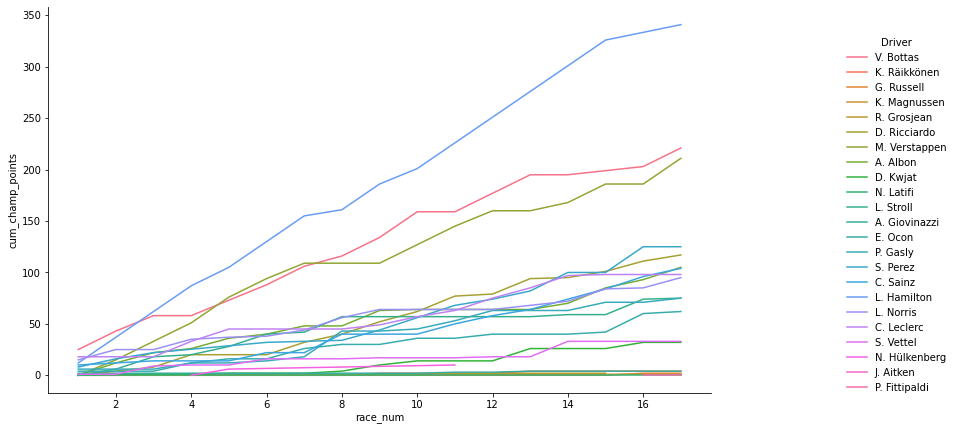

In [5]:
#Plot the cumulated results for all drivers during the whole season:

plot = sns.relplot(data=race2020df,
                   x='race_num',
                   y='cum_champ_points',
                   hue='Driver',
                   kind="line")

plot.fig.set_figwidth(14)
plot.fig.set_figheight(6)

## Find correlations in the data:
We will create a list contatining the column names of those with a positions and ratios.<br>
We will plot the correlations using <i>sns.pairplot</i> of the data belonging to these columns.

In [6]:
#Create the list containing the columns in question
corr_cols = [col for col in race_df.columns if ((col.startswith('r_')) or (col.endswith('_pos')))]
corr_cols

['qgrid_pos',
 'fp2_pos',
 'fp3_pos',
 'fp1_pos',
 'q_pos',
 'race_pos',
 'hist_qgrid_pos',
 'hist_fp2_pos',
 'hist_fp3_pos',
 'hist_fp1_pos',
 'hist_q_pos',
 'hist_race_pos',
 'best_fp_pos',
 'worst_fp_pos',
 'mean_fp_pos',
 'r_hist_qgrid_pos_2_fp',
 'r_hist_race_pos_2_fp']

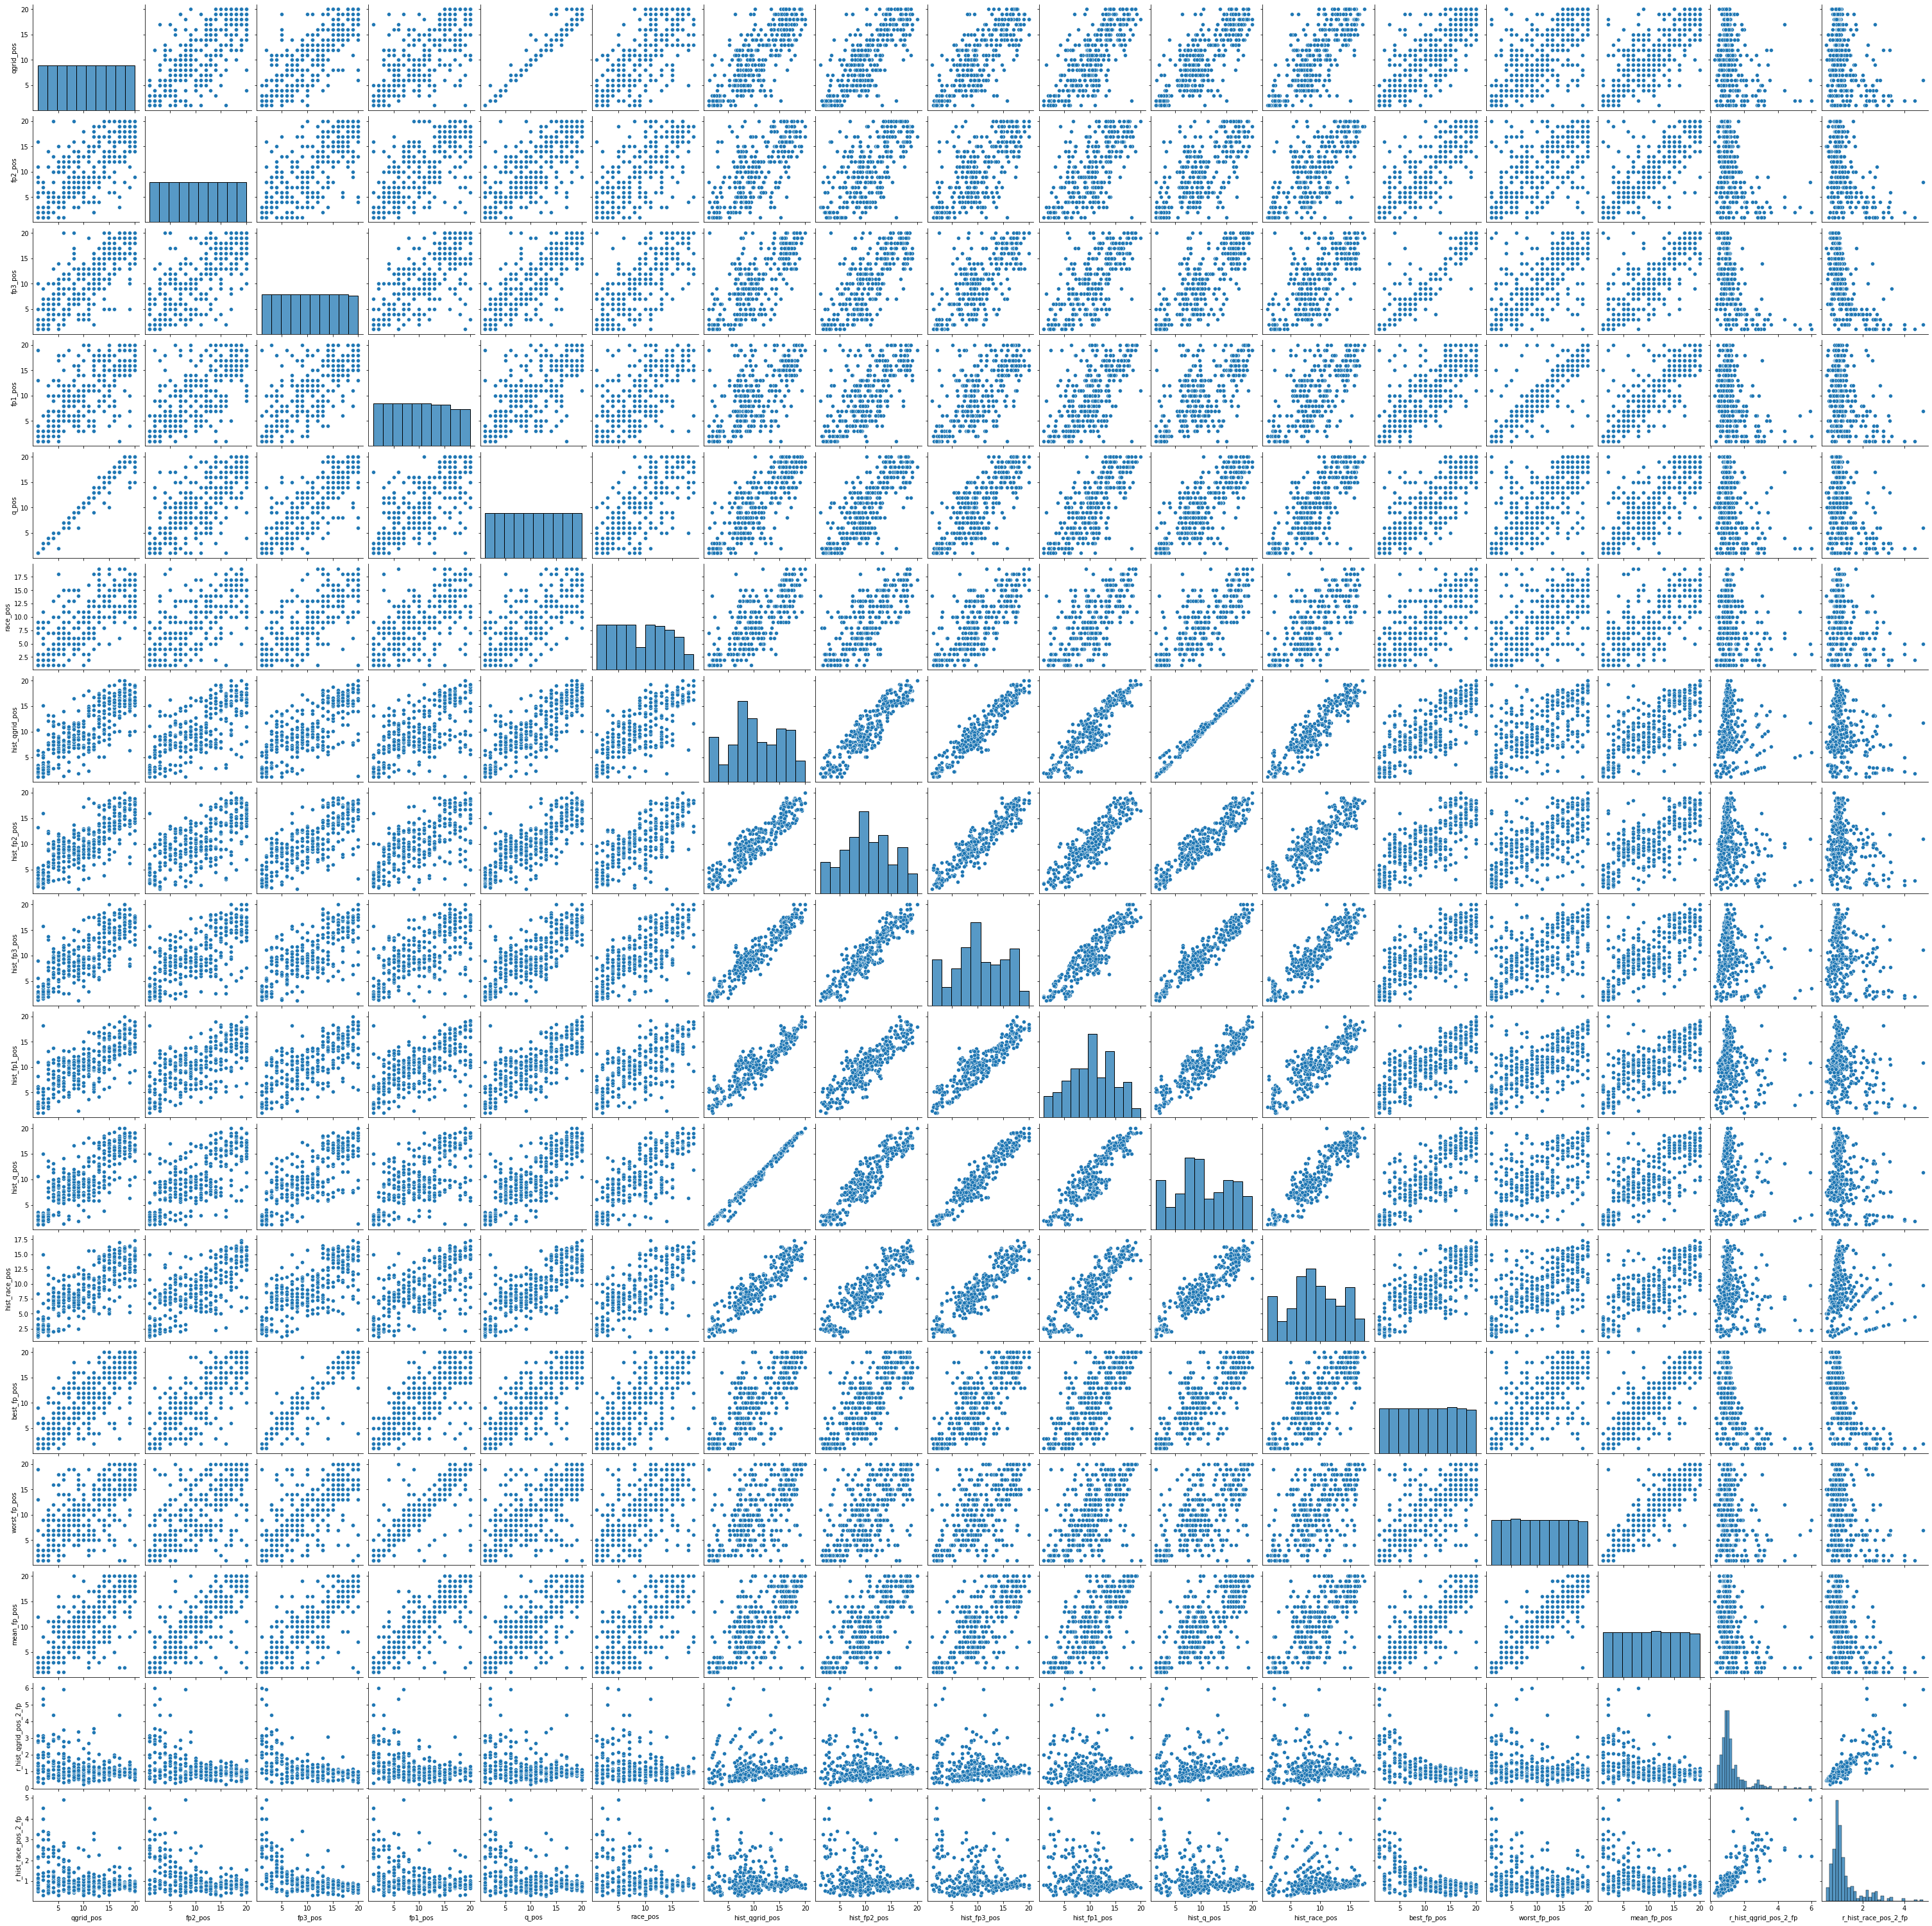

In [7]:
#Now we will plot all the correlations in one plot (This will take a while, use the 2020 df):
sns.pairplot(data=race2020df[corr_cols])

In [8]:
sorted(race_df.columns)

['Driver',
 'Nr.',
 'Team',
 'best_fp_pos',
 'best_fp_t',
 'champ_points',
 'finished_race',
 'fp1_pos',
 'fp1_t',
 'fp2_pos',
 'fp2_t',
 'fp3_pos',
 'fp3_t',
 'hist_fp1_pos',
 'hist_fp2_pos',
 'hist_fp3_pos',
 'hist_q_pos',
 'hist_qgrid_pos',
 'hist_race_pos',
 'is_Alfa Romeo',
 'is_AlphaTauri',
 'is_Alpine',
 'is_Aston Martin',
 'is_Caterham',
 'is_Ferrari',
 'is_HRT',
 'is_Haas F1',
 'is_Lotus',
 'is_Manor',
 'is_McLaren',
 'is_Mercedes',
 'is_Red Bull',
 'is_Williams',
 'mean_fp_pos',
 'mean_fp_t',
 'pos_gained',
 'q_pos',
 'q_t',
 'qgrid_pos',
 'r_hist_qgrid_pos_2_fp',
 'r_hist_race_pos_2_fp',
 'race_idx',
 'race_name',
 'race_num',
 'race_pos',
 'v_m_s',
 'velocity',
 'worst_fp_pos',
 'worst_fp_t',
 'year']

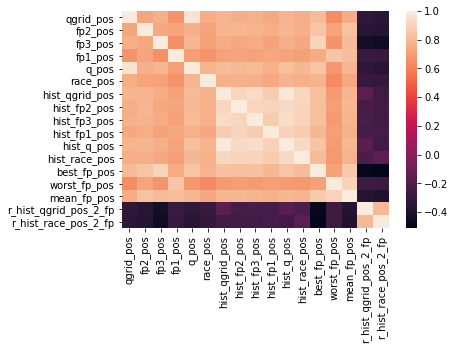

In [9]:
#For a faster visualisation using all the data, we have to switch to a simpler solution.
#We will calculate the correlations with pd.corr() and visualize them with an
#sns.heatmap:
correlations = race_df[corr_cols].corr()
sns.heatmap(correlations)

In [10]:
correlations[((correlations>0.6) | (correlations<-0.6))]

qgrid_pos   fp2_pos   fp3_pos   fp1_pos     q_pos  \
qgrid_pos               1.000000  0.733795  0.764697  0.664220  0.966566   
fp2_pos                 0.733795  1.000000  0.739336  0.729101  0.769159   
fp3_pos                 0.764697  0.739336  1.000000  0.655988  0.788448   
fp1_pos                 0.664220  0.729101  0.655988  1.000000  0.701726   
q_pos                   0.966566  0.769159  0.788448  0.701726  1.000000   
race_pos                0.758240  0.726114  0.712063  0.668344  0.784462   
hist_qgrid_pos          0.782304  0.782867  0.757544  0.713273  0.815889   
hist_fp2_pos            0.762107  0.792844  0.742703  0.729414  0.801764   
hist_fp3_pos            0.772765  0.777858  0.757411  0.710978  0.810076   
hist_fp1_pos            0.734580  0.762802  0.718060  0.735184  0.774522   
hist_q_pos              0.786703  0.788990  0.764882  0.725367  0.825575   
hist_race_pos           0.759726  0.767247  0.740153  0.707022  0.795096   
best_fp_pos             0.815134  0.845305  0.906368  0.748011  0.845527   
worst_fp_pos            0.640001  0.722643  0.668754  0.849573  0.678282   
mean_fp_pos             0.756581  0.838608  0.806036  0.818586  0.789766   
r_hist_qgrid_pos_2_fp        NaN       NaN       NaN       NaN       NaN   
r_hist_race_pos_2_fp         NaN       NaN       NaN       NaN       NaN   

                       race_pos  hist_qgrid_pos  hist_fp2_pos  hist_fp3_pos  \
qgrid_pos              0.758240        0.782304      0.762107      0.772765   
fp2_pos                0.726114        0.782867      0.792844      0.777858   
fp3_pos                0.712063        0.757544      0.742703      0.757411   
fp1_pos                0.668344        0.713273      0.729414      0.710978   
q_pos                  0.784462        0.815889      0.801764      0.810076   
race_pos               1.000000        0.773815      0.774479      0.774037   
hist_qgrid_pos         0.773815        1.000000      0.916611      0.936053   
hist_fp2_pos           0.774479        0.916611      1.000000      0.916422   
hist_fp3_pos           0.774037        0.936053      0.916422      1.000000   
hist_fp1_pos           0.737819        0.881021      0.908119      0.877953   
hist_q_pos             0.780813        0.990757      0.927049      0.943254   
hist_race_pos          0.771867        0.922821      0.907521      0.910879   
best_fp_pos            0.780685        0.834256      0.825830      0.832634   
worst_fp_pos           0.637065        0.689304      0.701646      0.687403   
mean_fp_pos            0.740661        0.790531      0.795324      0.783063   
r_hist_qgrid_pos_2_fp       NaN             NaN           NaN           NaN   
r_hist_race_pos_2_fp        NaN             NaN           NaN           NaN   

                       hist_fp1_pos  hist_q_pos  hist_race_pos  best_fp_pos  \
qgrid_pos                  0.734580    0.786703       0.759726     0.815134   
fp2_pos                    0.762802    0.788990       0.767247     0.845305   
fp3_pos                    0.718060    0.764882       0.740153     0.906368   
fp1_pos                    0.735184    0.725367       0.707022     0.748011   
q_pos                      0.774522    0.825575       0.795096     0.845527   
race_pos                   0.737819    0.780813       0.771867     0.780685   
hist_qgrid_pos             0.881021    0.990757       0.922821     0.834256   
hist_fp2_pos               0.908119    0.927049       0.907521     0.825830   
hist_fp3_pos               0.877953    0.943254       0.910879     0.832634   
hist_fp1_pos               1.000000    0.894300       0.873526     0.798098   
hist_q_pos                 0.894300    1.000000       0.927546     0.841701   
hist_race_pos              0.873526    0.927546       1.000000     0.814221   
best_fp_pos                0.798098    0.841701       0.814221     1.000000   
worst_fp_pos               0.698983    0.698482       0.681907     0.713010   
mean_fp_pos                0.772699    0.79717

We are aiming to predict F1 race results after the third free practice session.<br>
It appears that the features <i>hist_race_pos</i> and <i>best_fp_pos</i> will be usefull for this.

## If you have some time left over:
- Improve the value range and color map for the correlation plot.<br>
- Go back to the plot with the driver season points and order it by the amount of championship points the drivers scored. Then apply a better color map with discrete colors.